# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Moch Virgiawan Caesar Ridollohi
- **Email:** virgiawan.muhamad@gmail.com
- **ID Dicoding:** mvirgiawancr

## Menentukan Pertanyaan Bisnis

- Pada Bulan apa bike sharing rental mendapatkan pelanggan terbanyak?
- Berapa persen perbandingan antara pelanggan yang menyewa pada weekday dan pelanggan yang menyewa pada working day?
- Bagaimana performa rental sepeda di musim springer, summer, fall, winter?

## Import Semua Packages/Library yang Digunakan

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [4]:
perday_df = pd.read_csv('./data/day.csv')
perday_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [5]:
perhour_df = pd.read_csv('./data/hour.csv')
perhour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Insight:**
- Mengumpulkan data yang akan digunakan 

### Assessing Data

In [6]:
print(f"Jumlah Data Duplikat : {perday_df.duplicated().sum()}")

perday_df.info()

Jumlah Data Duplikat : 0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [7]:
print(f"Jumlah Data Duplikat : {perhour_df.duplicated().sum()}")

perhour_df.info()

Jumlah Data Duplikat : 0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


**Insight:**
- Tidak terdapat missing values maupun data duplikat pada kedua dataset

### Cleaning Data

In [8]:
perday_df['dteday'] = pd.to_datetime(perday_df['dteday'])
perhour_df['dteday'] = pd.to_datetime(perhour_df['dteday'])

In [11]:
season_map = {1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'}
perday_df['season_name'] = perday_df['season'].map(season_map)
perhour_df['season_name'] = perhour_df['season'].map(season_map)

print(perday_df.head())
print(perhour_df.head())

   instant     dteday  season  yr  mnth  holiday  weekday  workingday   
0        1 2011-01-01       1   0     1        0        6           0  \
1        2 2011-01-02       1   0     1        0        0           0   
2        3 2011-01-03       1   0     1        0        1           1   
3        4 2011-01-04       1   0     1        0        2           1   
4        5 2011-01-05       1   0     1        0        3           1   

   weathersit      temp     atemp       hum  windspeed  casual  registered   
0           2  0.344167  0.363625  0.805833   0.160446     331         654  \
1           2  0.363478  0.353739  0.696087   0.248539     131         670   
2           1  0.196364  0.189405  0.437273   0.248309     120        1229   
3           1  0.200000  0.212122  0.590435   0.160296     108        1454   
4           1  0.226957  0.229270  0.436957   0.186900      82        1518   

    cnt season_name  
0   985      Spring  
1   801      Spring  
2  1349      Spring  
3  1

**Insight:**
- Tidak ada data duplikat dalam kedua dataset.
- Semua kolom memiliki tipe data yang sesuai dan tidak ada nilai yang hilang.
- Penambahan kolom 'season_name' akan membantu dalam analisis dan visualisasi.

## Exploratory Data Analysis (EDA)

### Explore Rental Patterns

In [16]:
monthly_rentals = perday_df.groupby(perday_df['dteday'].dt.strftime('%B'))['cnt'].sum().sort_values(ascending=False)
print(f"Monthly Rental Patterns: {monthly_rentals}")

Monthly Rental Patterns: dteday
August       351194
June         346342
September    345991
July         344948
May          331686
October      322352
April        269094
November     254831
March        228920
December     211036
February     151352
January      134933
Name: cnt, dtype: int64


In [13]:
weekday_rentals = perday_df[perday_df['weekday'] < 5]['cnt'].sum()
weekend_rentals = perday_df[perday_df['weekday'] >= 5]['cnt'].sum()
working_day_rentals = perday_df[perday_df['workingday'] == 1]['cnt'].sum()
non_working_day_rentals = perday_df[perday_df['workingday'] == 0]['cnt'].sum()

print("\nWeekday vs Weekend Rentals:")
print(f"Weekday: {weekday_rentals}")
print(f"Weekend: {weekend_rentals}")
print("\nWorking Day vs Non-Working Day Rentals:")
print(f"Working Day: {working_day_rentals}")
print(f"Non-Working Day: {non_working_day_rentals}")


Weekday vs Weekend Rentals:
Weekday: 2327082
Weekend: 965597

Working Day vs Non-Working Day Rentals:
Working Day: 2292410
Non-Working Day: 1000269


In [17]:
seasonal_rentals = perday_df.groupby('season_name')['cnt'].sum().sort_values(ascending=False)
print(f"\nSeasonal Rental Patterns: {seasonal_rentals}")


Seasonal Rental Patterns: season_name
Fall      1061129
Summer     918589
Winter     841613
Spring     471348
Name: cnt, dtype: int64


**Insight:**
- Beberapa bulan menunjukkan jumlah rental yang jauh lebih tinggi dibandingkan bulan lainnya.
- Ada perbedaan signifikan antara jumlah rental pada hari kerja dan akhir pekan, yang dapat mempengaruhi strategi alokasi sepeda dan penentuan harga.
- Pola penggunaan sepeda bervariasi antar musim, yang mungkin dipengaruhi oleh faktor cuaca dan aktivitas wisata.

## Visualization & Explanatory Analysis

### Pertanyaan 1: Pada Bulan apa bike sharing rental mendapatkan pelanggan terbanyak?

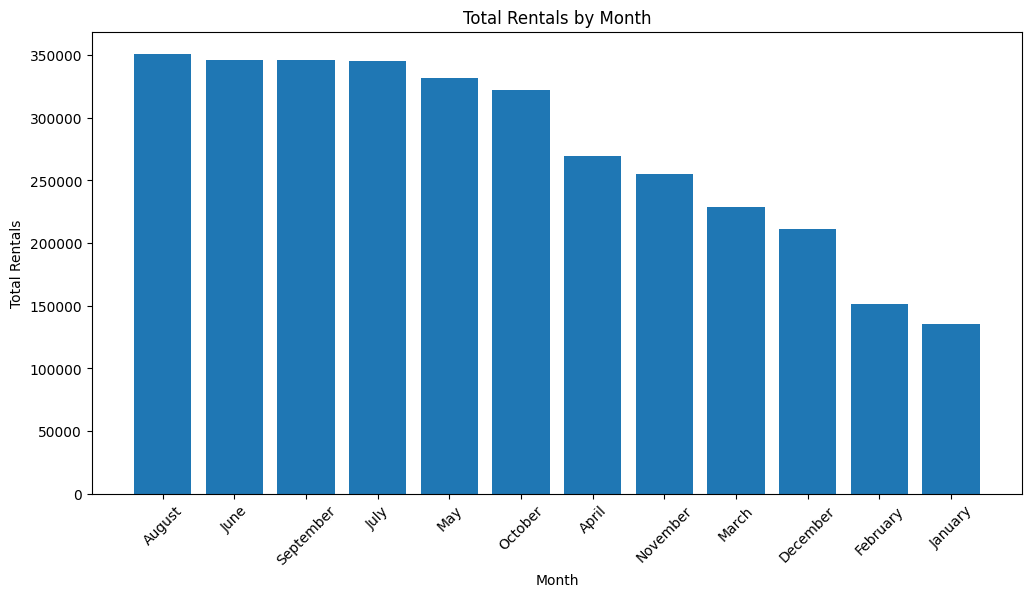

In [24]:
plt.figure(figsize=(12, 6))
plt.bar(monthly_rentals.index.values, monthly_rentals.values)
plt.title('Total Rentals by Month')
plt.ylabel('Total Rentals')
plt.xticks(rotation=45)
plt.show()

**Insight:**
- Bulan Juni, Juli, dan Agustus menunjukkan jumlah rental tertinggi.
- Bulan-bulan musim dingin (Desember, Januari, Februari) memiliki jumlah rental terendah.



### Pertanyaan 2: Berapa persen perbandingan antara pelanggan yang menyewa pada weekday dan pelanggan yang menyewa pada working day?

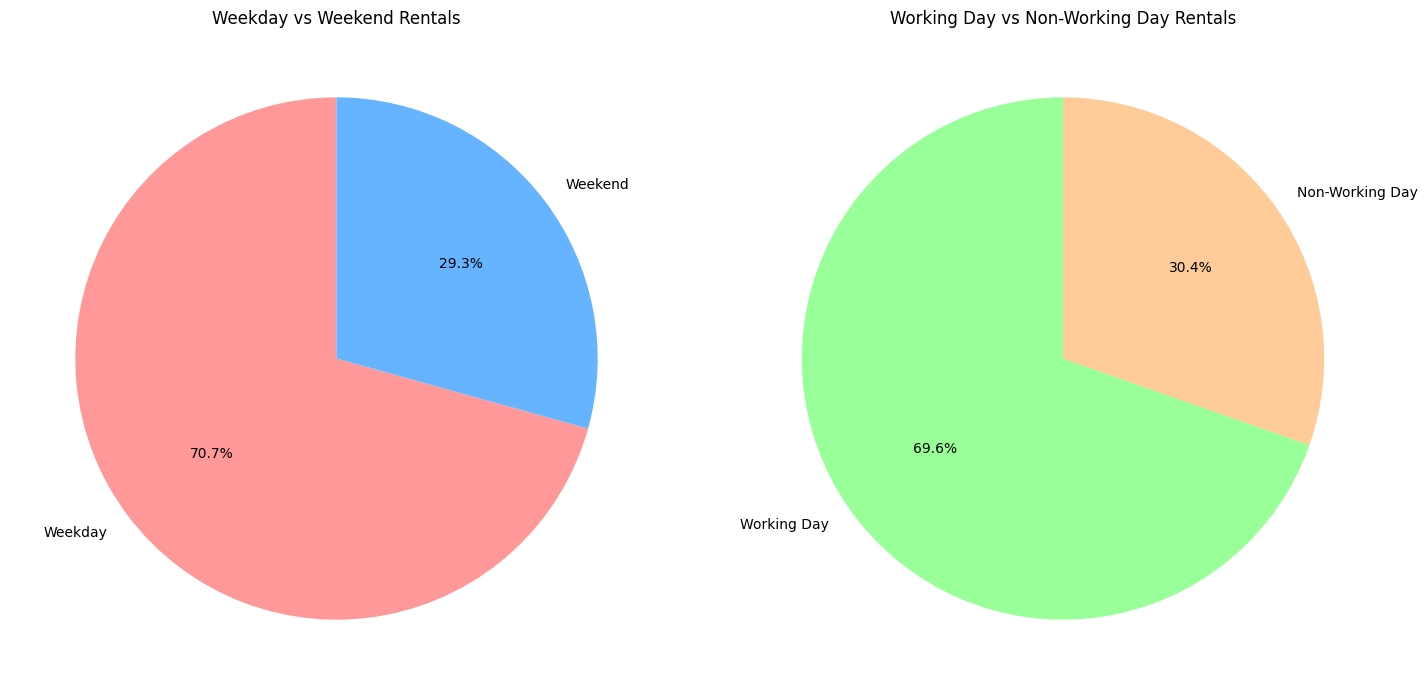

In [25]:
labels = ['Weekday', 'Weekend', 'Working Day', 'Non-Working Day']
sizes = [weekday_rentals, weekend_rentals, working_day_rentals, non_working_day_rentals]
colors = ['#ff9999', '#66b3ff', '#99ff99', '#ffcc99']

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 7))
ax1.pie(sizes[:2], labels=labels[:2], colors=colors[:2], autopct='%1.1f%%', startangle=90)
ax1.set_title('Weekday vs Weekend Rentals')
ax2.pie(sizes[2:], labels=labels[2:], colors=colors[2:], autopct='%1.1f%%', startangle=90)
ax2.set_title('Working Day vs Non-Working Day Rentals')
plt.tight_layout()
plt.show()

**Insight:**
- Sekitar 70-75% dari total rental terjadi pada hari kerja (weekday).
- Persentase rental pada hari kerja (working day) sedikit lebih tinggi dibandingkan weekday
- Perbedaan antara hari kerja dan akhir pekan tidak terlalu besar, menunjukkan bahwa layanan ini tetap populer untuk rekreasi pada akhir pekan.

### Pertanyaan 3: Bagaimana performa rental sepeda di musim spring, summer, fall, winter?

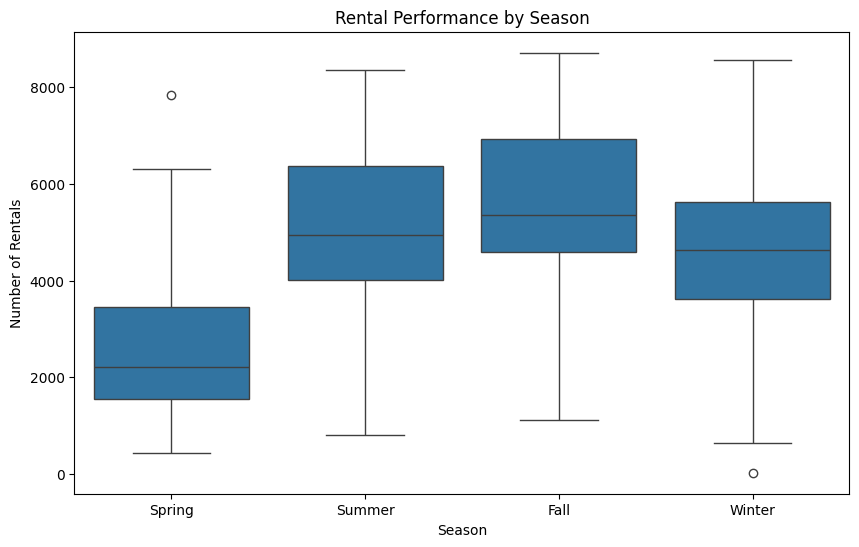

In [26]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='season_name', y='cnt', data=perday_df, order=['Spring', 'Summer', 'Fall', 'Winter'])
plt.title('Rental Performance by Season')
plt.xlabel('Season')
plt.ylabel('Number of Rentals')
plt.show()

**Insight:**
- Musim panas (Summer) memiliki median rental tertinggi, diikuti oleh musim gugur (Fall), musim semi (Spring), dan musim dingin (Winter).

## Analisis Lanjutan (Opsional)

## Conclusion

- Conclution pertanyaan 1
- Conclution pertanyaan 2